From now on we will assume the given molecule is ammonia, but it works for any molecule.

In [1]:
import numpy as np
from scipy.constants import Boltzmann as boltzmann, h, c 
from timeit import default_timer as time
import matplotlib.pyplot as plt

In [9]:
def partition(n: int, omegas: list) -> int:

    m = len(omegas)
    dp = [0 for _ in range(n+1)]
    dp[0] = 1
    for i in range(0, m):
        for j in range(omegas[i], n+1):
            dp[j] += dp[j-omegas[i]]

    return dp[n]

def Q_dp(Temperature: float, molecule: list) -> float:

    const = 100 * h * c / (boltzmann * Temperature)
    upper_bound = round(10 * Temperature)
    sum = 0
    for k in range(upper_bound, -1, -1):
        sum += partition(k, molecule) * np.exp(-const*(k))
        
    return sum

ammonia = [3534, 3464, 3464, 1765, 1765, 1139]
benzol = [395, 395, 599, 599, 677, 700, 838, 838, 954, 954, 981, 994, 1014, 1048, 1048, 1137, 1162, 1162, 1332, 1376, 1477, 1477, 1612, 1612, 3080, 3092, 3092, 3110, 3110, 3121]

In [10]:
Q_dp(1000, benzol)

1835.1749887611975

In [4]:
def dQ(Temperature: float) -> float:
    
    const = 100 * h * c / (boltzmann * Temperature)                      
    upper_bound = round(20 * Temperature)                                          
    omega = [3534, 3464, 3464, 1765, 1765, 1139]
    sum = 0
    for k in range(upper_bound, -1, -1):
        sum += k * partition(k, omega) * np.exp(-const*(k))
    sum *= 1/(boltzmann * Temperature**2)    

    return sum

In [5]:
def d2Q(Temperature: float) -> float:
    
    const = 100 * h * c / (boltzmann * Temperature)                      
    upper_bound = round(20 * Temperature)                                          
    omega = [3534, 3464, 3464, 1765, 1765, 1139]
    sum = 0
    for k in range(upper_bound, -1, -1):
        sum += k**2 * partition(k, omega) * np.exp(-const*(k))
    sum *= 1/(boltzmann * Temperature**2)**2    

    return sum

In [60]:
Q(1000)

1.4922237438106645

In [27]:
Q(2000)

4.45986991087236

In [76]:
def Q_ammonia(Temp):

    const = 100 * h * c / (boltzmann * Temp)
    omega = [3534, 3464, 3464, 1765, 1765, 1139]
    upper_bound = 100 * Temp
    max_elements = int(5 + np.log(Temp))
    sum = 0

    for a in range(max_elements):
        if a*omega[0] > upper_bound:
            continue
        for b in range(max_elements):
            if a*omega[0] + b*omega[1] > upper_bound:
                continue
            for x in range(max_elements):
                if a*omega[0] + b*omega[1] + x*omega[2] > upper_bound:
                    continue
                for d in range(max_elements):
                    if a*omega[0] + b*omega[1] + x*omega[2] + d*omega[3] > upper_bound:
                        continue
                    for e in range(max_elements):
                        if a*omega[0] + b*omega[1] + x*omega[2] + d*omega[3] + e*omega[4] > upper_bound:
                            continue
                        for f in range(max_elements):
                            if a*omega[0] + b*omega[1] + x*omega[2] + d*omega[3] + e*omega[4] + f*omega[5] > upper_bound:
                                continue
                            sum += np.exp(-const * (a*omega[0] + b*omega[1] + x*omega[2] + d*omega[3] + e*omega[4] + f*omega[5]))
    return sum  

In [77]:
print(Q_ammonia(1000))
Q_ammonia(2000)

1.4922598280375539


4.460476847499919

In [5]:
def Q_pontos(Temp):

    const = 100 * h * c / (boltzmann * Temp)
    omega = [3534, 3464, 3464, 1765, 1765, 1139]
    max_elements = int(5 + np.log(Temp))
    sum = 0

    for a in range(max_elements):
        for b in range(max_elements):
            for x in range(max_elements):
                for d in range(max_elements):
                    for e in range(max_elements):
                        for f in range(max_elements):
                            sum += np.exp(-const * (a*omega[0] + b*omega[1] + x*omega[2] + d*omega[3] + e*omega[4] + f*omega[5]))
    return sum  

In [6]:
Q_pontos(1000)

1.4922598280375539

In [79]:
print(Q_pontos(1000))
Q_pontos(2000)

1.4922598280375539


4.460476847499919

In [81]:
Q_pontos(1e5)

3609694.3251393978

In [4]:
int(5 + np.log(800))

11

In [4]:
times = []
values = []

for k in range(1, 1001, 10):
    t = time()
    values.append(Q(k))
    times.append(time()-t)

print(times)
print(values)

[7.650000043213367e-05, 0.00041290000081062317, 0.0009878000000753673, 0.0017317000001639826, 0.0026799999996001134, 0.0035821999990730546, 0.004490199999054312, 0.005611100001260638, 0.007568699998955708, 0.009008099999846308, 0.011285999999017804, 0.014003399999637622, 0.015229700000418234, 0.018754000000626547, 0.02496699999937846, 0.029414399999950547, 0.036973199999920325, 0.04789530000016384, 0.05520510000133072, 0.06929700000000594, 0.0894852000001265, 0.10405940000055125, 0.12250999999923806, 0.14905299999918498, 0.17767350000031001, 0.20273029999952996, 0.2367802999997366, 0.27914029999919876, 0.3329757999999856, 0.36739179999858607, 0.4389866000001348, 0.48332510000000184, 0.560066399999414, 0.659189800000604, 0.7655680000007123, 0.7436811000006855, 0.8552765000004001, 0.8953409999994619, 0.9938285999996879, 1.0035468000005494, 1.1091108999989956, 1.24206520000007, 1.3234589000003325, 1.441672999999355, 1.617386500000066, 1.6542724999999336, 1.8285105000013573, 1.913957199998

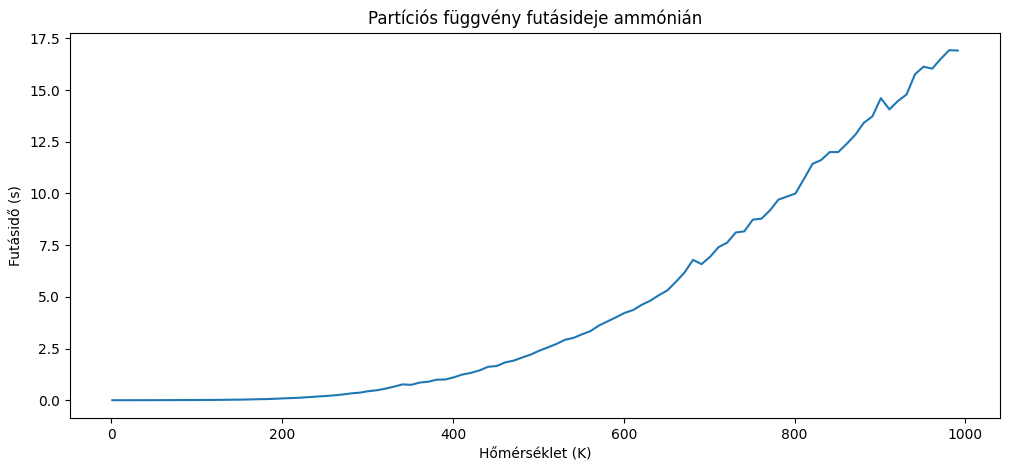

In [11]:
plt.figure(figsize=(12,5))
plt.plot( [k for k in range(1, 1001, 10)], times)
plt.ylabel('Futásidő (s)')
plt.xlabel('Hőmérséklet (K)')
plt.title('Partíciós függvény futásideje ammónián')
plt.show()    

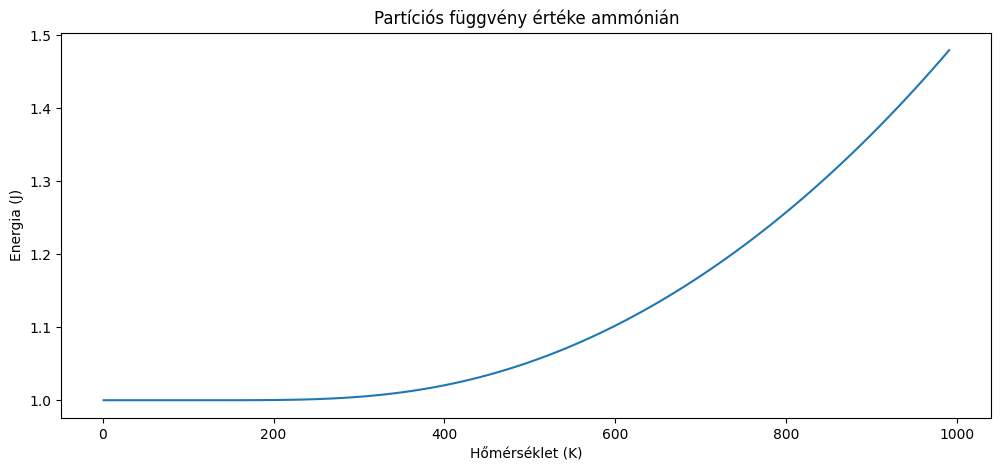

In [13]:
plt.figure(figsize=(12,5))
plt.plot( [k for k in range(1, 1001, 10)], values)
plt.ylabel('Energia (J)')
plt.xlabel('Hőmérséklet (K)')
plt.title('Partíciós függvény értéke ammónián')
plt.show()    